## IBM data science certificate 

### 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
#!pip install geopy
from geopy.geocoders import Nominatim ### convert an address into latitude & longitude values
#!pip install geocoder
import geocoder
import requests # library to handle request
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize  # transform JSON file into a pandas dataframe

#matplotlib library
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('libraries imported')

libraries imported


### 2. Web scraping to get data of Dublin neighborhoods

#### let's get the coordinates of Dublin, CA

In [3]:
address='Dublin, CA'
geolocator=Nominatim(user_agent='dublin_explorer')
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print('The geographical coordinate of Dublin, CA are {},{}'.format(latitude,longitude))

The geographical coordinate of Dublin, CA are 37.7021521,-121.9357918


#### let's look into the neighborhood data from nextdoor.com & https://www.680homes.com

In [4]:
#@hide 
url='https://nextdoor.com/city/dublin--ca/'
dublin_results=requests.get(url).text
soup=BeautifulSoup(dublin_results,'lxml')
soup.find_all('div')

[<div id="address_entry">
 <div class="background us splash-background-container" id="sign_up_top_section">
 <div class="js-splash-background-top-image splash-background-top-image"></div>
 <div class="js-splash-background-top-image splash-background-top-image"></div>
 <div class="container " id="global_nav_container">
 <div class="hide" id="placesTarget"></div>
 <div class="navbar navbar-fixed-top navbar-inverse seo-navbar" role="menubar">
 <div class="navbar-inner shadow">
 <div class="container seo-nav-container">
 <div class="top-nav">
 <div class="primary-nav">
 <div class="brand">
 <a href="/" title="Nextdoor">
 <div class="nd-logo seo-nav-nd-logo"><i>Nextdoor</i></div>
 </a>
 </div>
 </div>
 <div class="logged-out-header">
 <a href="/about_us/">About</a>
 <a class="hidden-phone" data-utm-tracking="true" href="/login/">Sign in</a>
 <a data-utm-tracking="true" href="/">Sign up</a>
 </div>
 </div>
 </div>
 </div>
 <div class="breadcrumb-container">
 <div class="container seo-breadcr

In [5]:
url='https://www.680homes.com/Search-By-Neighborhood/Dublin/'
dublin_results1=requests.get(url).text
soup=BeautifulSoup(dublin_results1,'lxml')
soup

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>Homes for Sale by Neighborhood in Dublin CA</title>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="black" name="apple-mobile-web-app-status-bar-style"/>
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="Call Doug Buenz &amp; The 680 Group at (925) 621-0680 today! Explore the neighborhoods of Dublin CA, search for real estate and available homes for sale in Dublin, including market statistics, detailed neighborhood information, designated schools, and HOA information." name="description"/>
<meta content="Homes for Sale in Dublin CA, Homes for Sale in the Dublin Neighborhood, Dublin CA Real Estate

In [6]:
neighbor_list=soup.find_all('div',class_='neigh-name-list')
avgprice_list=soup.find_all('div',class_='neigh-name-avgprice')
print(len(neighbor_list))
print(len(avgprice_list))

29
29


In [7]:
neighborlist=[]
for row in neighbor_list:
    neighborlist.append(row.text.strip())
neighborlist

['Briar Hills',
 'California Creekside',
 'Dublin Hills Estates',
 'Echo Park',
 'Emerald Vista',
 'Ponderosa Village',
 'Riva & Rainsong',
 'San Ramon Village',
 'Silvergate Area',
 'Tassajara Meadows',
 'Willow Creek',
 'Boulevard',
 'Dublin Greene',
 'Dublin Ranch Area',
 'Emerald Park',
 'Fallon Crossing Area',
 'Foothill Estates',
 'Irongate',
 'Jordan Ranch',
 'Sorrento',
 'Wallis Ranch',
 'Bordeaux Estates & Images',
 'Dublin Ranch Golf Club',
 'Hansen Hill & Hacienda Heights',
 'Pinnacle Ridge',
 'Positano',
 'Schaefer Ranch',
 'Tassajara Hills',
 'Veneto & The Heights at Positano']

In [8]:
pricelist=[]
for row in avgprice_list:
    pricelist.append(row.text.strip())
pricelist

['Average Sales Price :  $1,033,941',
 'Average Sales Price :  $1,069,200',
 'Average Sales Price :  $938,181',
 'Average Sales Price :  $853,547',
 'Average Sales Price :  $880,500',
 'Average Sales Price :  $960,455',
 'Average Sales Price :  $1,021,929',
 'Average Sales Price :  $855,731',
 'Average Sales Price :  $1,002,000',
 'Average Sales Price :  $1,034,313',
 'Average Sales Price :  $1,043,500',
 'Average Sales Price :  $1,058,512',
 'Average Sales Price :  $1,238,000',
 'Average Sales Price :  $1,293,603',
 'Average Sales Price :  $1,207,000',
 'Average Sales Price :  $1,219,879',
 'Average Sales Price :  $1,090,468',
 'Average Sales Price :  $1,097,846',
 'Average Sales Price :  $1,174,455',
 'Average Sales Price :  $1,059,714',
 'Average Sales Price :  $1,205,833',
 'Average Sales Price :  $1,298,651',
 'Average Sales Price :  $1,610,200',
 'Average Sales Price :  $1,424,600',
 'Average Sales Price :  $2,121,750',
 'Average Sales Price :  $1,459,027',
 'Average Sales Price 

In [9]:
pricelist[1][24:]

'1,069,200'

In [11]:
# soup.find_all('div',class_='column')[0]

<div class="column">
<div class="hood_group">
<p class="title">A</p>
<p><a href="https://nextdoor.com/neighborhood/arivare--dublin--ca/">Arivare</a></p>
<p><a href="https://nextdoor.com/neighborhood/arrivare--dublin--ca/">Arrivare</a></p>
</div>
<div class="hood_group">
<p class="title">C</p>
<p><a href="https://nextdoor.com/neighborhood/californiahighlands--dublin--ca/">California Highlands</a></p>
<p><a href="https://nextdoor.com/neighborhood/connollystation--dublin--ca/">Connolly Station</a></p>
</div>
<div class="hood_group">
<p class="title">D</p>
<p><a href="https://nextdoor.com/neighborhood/dublinranch--dublin--ca/">Dublin Ranch</a></p>
</div>
<div class="hood_group">
<p class="title">E</p>
<p><a href="https://nextdoor.com/neighborhood/echoparkdublin--dublin--ca/">Echo Park</a></p>
</div>
</div>

In [32]:
#scrape_list=[]
#for i in range(len(soup.find_all('div',class_='hood_group'))):
#    scrape_list.append(soup.find_all('div',class_='hood_group')[i].findAll('p')[1:])
#scrape_list

[[<p><a href="https://nextdoor.com/neighborhood/arivare--dublin--ca/">Arivare</a></p>,
  <p><a href="https://nextdoor.com/neighborhood/arrivare--dublin--ca/">Arrivare</a></p>],
 [<p><a href="https://nextdoor.com/neighborhood/californiahighlands--dublin--ca/">California Highlands</a></p>,
  <p><a href="https://nextdoor.com/neighborhood/connollystation--dublin--ca/">Connolly Station</a></p>],
 [<p><a href="https://nextdoor.com/neighborhood/dublinranch--dublin--ca/">Dublin Ranch</a></p>],
 [<p><a href="https://nextdoor.com/neighborhood/echoparkdublin--dublin--ca/">Echo Park</a></p>],
 [<p><a href="https://nextdoor.com/neighborhood/hansenranch--dublin--ca/">Hansen Ranch</a></p>,
  <p><a href="https://nextdoor.com/neighborhood/hillbrookbarnet--dublin--ca/">Hillbrook - Barnet</a></p>],
 [<p><a href="https://nextdoor.com/neighborhood/jordanranch--dublin--ca/">Jordan Ranch</a></p>],
 [<p><a href="https://nextdoor.com/neighborhood/longfordway--dublin--ca/">Longford Way</a></p>],
 [<p><a href="h

In [38]:
## function to flat a nested list with multiple levels of nesting 
## cannot quite understand

def removeNestings(l):

    for i in l:
        if type(i)==list:
            removeNestings(i)
        else:
            output.append(i)
    return output

In [40]:
output=[]
new_list=removeNestings(scrape_list)
new_list

[<p><a href="https://nextdoor.com/neighborhood/arivare--dublin--ca/">Arivare</a></p>,
 <p><a href="https://nextdoor.com/neighborhood/arrivare--dublin--ca/">Arrivare</a></p>,
 <p><a href="https://nextdoor.com/neighborhood/californiahighlands--dublin--ca/">California Highlands</a></p>,
 <p><a href="https://nextdoor.com/neighborhood/connollystation--dublin--ca/">Connolly Station</a></p>,
 <p><a href="https://nextdoor.com/neighborhood/dublinranch--dublin--ca/">Dublin Ranch</a></p>,
 <p><a href="https://nextdoor.com/neighborhood/echoparkdublin--dublin--ca/">Echo Park</a></p>,
 <p><a href="https://nextdoor.com/neighborhood/hansenranch--dublin--ca/">Hansen Ranch</a></p>,
 <p><a href="https://nextdoor.com/neighborhood/hillbrookbarnet--dublin--ca/">Hillbrook - Barnet</a></p>,
 <p><a href="https://nextdoor.com/neighborhood/jordanranch--dublin--ca/">Jordan Ranch</a></p>,
 <p><a href="https://nextdoor.com/neighborhood/longfordway--dublin--ca/">Longford Way</a></p>,
 <p><a href="https://nextdoor.co

In [43]:
neighborlist=[]
for row in new_list:
    neighborlist.append(row.text)
neighborlist

['Arivare',
 'Arrivare',
 'California Highlands',
 'Connolly Station',
 'Dublin Ranch',
 'Echo Park',
 'Hansen Ranch',
 'Hillbrook - Barnet',
 'Jordan Ranch',
 'Longford Way',
 'Piazza',
 'Positano',
 'Schaefer Ranch',
 'Tassajara Hills',
 'The Preserve',
 'Tralee',
 'Village/Dublin',
 'Village Pkwy',
 'Wallis Ranch',
 'West Dublin']

#### get coordinate of each neighborhood

In [10]:
# define a function to get coordinates
def get_coords(neighborhood):
    # initialize your variable to None
    lat_lng_coords=None
    #loop until you get the coordinates
    while(lat_lng_coords is None):
        g=geocoder.arcgis('{}, Dublin,CA'.format(neighborhood))
        lat_lng_coords=g.latlng
    return lat_lng_coords

In [11]:
dublin_coords=[get_coords(neighborhood) for neighborhood in neighborlist]
print(len(dublin_coords))
dublin_coords

29


[[37.723025509564586, -121.92976527643334],
 [36.610520000000065, -121.69299999999998],
 [43.51679000000007, -81.28304999999995],
 [34.07609000000008, -118.25580999999994],
 [37.713075144417, -121.92497533424324],
 [32.586473085608546, -82.86168353147823],
 [37.70423000000005, -121.91634999999997],
 [37.721580000000074, -121.92864999999995],
 [37.70724074815049, -121.9464746523802],
 [37.73092997907852, -121.87100180575341],
 [37.72527107252977, -121.9107872073115],
 [37.70556689919004, -121.87497577993891],
 [37.710675, -121.94034299999998],
 [37.71699815934966, -121.86834183008371],
 [37.713075144417, -121.92497533424324],
 [37.70267234710622, -121.85047725387362],
 [34.633320000000026, -120.48238999999995],
 [37.70423000000005, -121.91634999999997],
 [37.713486706564254, -121.84724514671788],
 [53.26691183426653, -6.224202866611063],
 [37.73385550938425, -121.87405999431675],
 [36.86127300000001, -119.72917799999999],
 [37.72551994445754, -121.85716008050079],
 [33.99413000000004, -

In [12]:
# create dataframe to populate the coordinates into latitude and longitude
df_coords=pd.DataFrame(dublin_coords,columns=['Latitude','Longitude'])
df_coords['Neighborhood']=neighborlist
df_coords=df_coords[['Neighborhood','Latitude','Longitude']]
df_coords

,Neighborhood,Latitude,Longitude
0,Briar Hills,37.723026,-121.929765
1,California Creekside,36.610520,-121.693000
2,Dublin Hills Estates,43.516790,-81.283050
3,Echo Park,34.076090,-118.255810
4,Emerald Vista,37.713075,-121.924975
5,Ponderosa Village,32.586473,-82.861684
6,Riva & Rainsong,37.704230,-121.916350
7,San Ramon Village,37.721580,-121.928650
8,Silvergate Area,37.707241,-121.946475
9,Tassajara Meadows,37.730930,-121.871002


In [13]:
df_coords['AvgPrice']=pricelist
df_coords

,Neighborhood,Latitude,Longitude,AvgPrice
0,Briar Hills,37.723026,-121.929765,"Average Sales Price : $1,033,941"
1,California Creekside,36.610520,-121.693000,"Average Sales Price : $1,069,200"
2,Dublin Hills Estates,43.516790,-81.283050,"Average Sales Price : $938,181"
3,Echo Park,34.076090,-118.255810,"Average Sales Price : $853,547"
4,Emerald Vista,37.713075,-121.924975,"Average Sales Price : $880,500"
5,Ponderosa Village,32.586473,-82.861684,"Average Sales Price : $960,455"
6,Riva & Rainsong,37.704230,-121.916350,"Average Sales Price : $1,021,929"
7,San Ramon Village,37.721580,-121.928650,"Average Sales Price : $855,731"
8,Silvergate Area,37.707241,-121.946475,"Average Sales Price : $1,002,000"
9,Tassajara Meadows,37.730930,-121.871002,"Average Sales Price : $1,034,313"


In [14]:
price=[float(i[24:].replace(',','')) for i in df_coords.AvgPrice]
df_coords['Price']=price
df_coords.drop('AvgPrice',axis=1,inplace=True)
df_coords.head(10)

,Neighborhood,Latitude,Longitude,Price
0,Briar Hills,37.723026,-121.929765,1033941.0
1,California Creekside,36.610520,-121.693000,1069200.0
2,Dublin Hills Estates,43.516790,-81.283050,938181.0
3,Echo Park,34.076090,-118.255810,853547.0
4,Emerald Vista,37.713075,-121.924975,880500.0
5,Ponderosa Village,32.586473,-82.861684,960455.0
6,Riva & Rainsong,37.704230,-121.916350,1021929.0
7,San Ramon Village,37.721580,-121.928650,855731.0
8,Silvergate Area,37.707241,-121.946475,1002000.0
9,Tassajara Meadows,37.730930,-121.871002,1034313.0


In [15]:

#remove Dublin, OH and Dublin, Ireland
df_coords=df_coords[(df_coords['Longitude']<=-121) & (df_coords['Longitude']>=-122) &(df_coords['Latitude']>=37)&(df_coords['Latitude']<=38)].reset_index(drop=True)

df_coords

,Neighborhood,Latitude,Longitude,Price
0,Briar Hills,37.723026,-121.929765,1033941.0
1,Emerald Vista,37.713075,-121.924975,880500.0
2,Riva & Rainsong,37.704230,-121.916350,1021929.0
3,San Ramon Village,37.721580,-121.928650,855731.0
4,Silvergate Area,37.707241,-121.946475,1002000.0
5,Tassajara Meadows,37.730930,-121.871002,1034313.0
6,Willow Creek,37.725271,-121.910787,1043500.0
7,Boulevard,37.705567,-121.874976,1058512.0
8,Dublin Greene,37.710675,-121.940343,1238000.0
9,Dublin Ranch Area,37.716998,-121.868342,1293603.0


#### create a map of Dublin with all neighborhoods superimposed on top

In [16]:
# get the coordinates of Dublin
address='Dublin, CA'
geolocator=Nominatim(user_agent='dublin_explorer')
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print('The geographical coordinate of Dublin, CA are {},{}'.format(latitude,longitude))

The geographical coordinate of Dublin, CA are 37.7021521,-121.9357918


In [17]:
# create map of Dublin using latitude and longitude values
map_dublin=folium.Map(location=[latitude,longitude],zoom_start=12)

#add markers to map
for lat, lng, neighborhood in zip(df_coords['Latitude'], df_coords['Longitude'], df_coords['Neighborhood']):
    label='{}'.format(neighborhood)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7
    ).add_to(map_dublin)

map_dublin

### 3. Leverage Foursquare API to get venue data of Dublin neighborhoods

In [18]:
# define Foursquare Credentials and Version
CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: your Foursquare ID
CLIENT_SECRET:your Foursquare Secret


In [19]:
 # @hidden_cell

CLIENT_ID = 'GQGROWFIHLRKKB2RI15T00PYM4P0K25V3AL3D0O0GLPZLJVZ' # your Foursquare ID
CLIENT_SECRET = '5N0GX3GTBXP10BHF4ZOR2O4ANJWZS1J0H5VFDZKHJVXPMMDM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GQGROWFIHLRKKB2RI15T00PYM4P0K25V3AL3D0O0GLPZLJVZ
CLIENT_SECRET:5N0GX3GTBXP10BHF4ZOR2O4ANJWZS1J0H5VFDZKHJVXPMMDM


####  I will test to get 100 venues in my neighborhood (Arivare)

In [20]:
LIMIT=100
radius=1500

 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    df_coords.loc[5,'Latitude'], 
    df_coords.loc[5,'Longitude'], 
    radius, 
    LIMIT)
url # display UR

'https://api.foursquare.com/v2/venues/explore?&client_id=GQGROWFIHLRKKB2RI15T00PYM4P0K25V3AL3D0O0GLPZLJVZ&client_secret=5N0GX3GTBXP10BHF4ZOR2O4ANJWZS1J0H5VFDZKHJVXPMMDM&v=20180605&ll=37.73092997907852,-121.87100180575341&radius=1500&limit=100'

In [21]:
# send the GET request and examine the results
results=requests.get(url).json()
print(len(results))
nearby_venues=json_normalize(results['response']['groups'][0]['items'])
nearby_venues.head(10)

2


,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.distance,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-49ce90b3f964a5205b5a1fe3-0,"[{'id': '4bf58dd8d48988d1e6941735', 'name': 'G...",49ce90b3f964a5205b5a1fe3,5900 Signal Hill Dr,US,Dublin,United States,1356,"[5900 Signal Hill Dr, Dublin, CA 94568, United...","[{'label': 'display', 'lat': 37.72503754678855...",37.725038,-121.857521,94568,CA,Dublin Ranch Golf Club,0,[]
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-589e5f3e110d0313493ec7af-1,"[{'id': '52e81612bcbc57f1066b7a26', 'name': 'R...",589e5f3e110d0313493ec7af,NaN,US,Dublin,United States,680,"[Dublin, CA, United States]","[{'label': 'display', 'lat': 37.73595515095812...",37.735955,-121.875399,NaN,CA,Kindred House,0,[]
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-55bb02ed498ec11f6538e303-2,"[{'id': '5453de49498eade8af355881', 'name': 'B...",55bb02ed498ec11f6538e303,5598 Crestridge Ter,US,Dublin,United States,1305,"[5598 Crestridge Ter, Dublin, CA 94568, United...","[{'label': 'display', 'lat': 37.71926926474386...",37.719269,-121.869385,94568,CA,"ERPE, Inc",0,[]
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4ce87564948f224bd1b0f05d-3,"[{'id': '4bf58dd8d48988d102941735', 'name': 'Y...",4ce87564948f224bd1b0f05d,NaN,US,San Ramon,United States,1360,"[San Ramon, CA 94583, United States]","[{'label': 'display', 'lat': 37.72319470520862...",37.723195,-121.882969,94583,CA,The Yoga Company,0,[]
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b64cd91f964a52055d12ae3-4,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4b64cd91f964a52055d12ae3,NaN,US,Dublin,United States,1484,"[Dublin, CA 94568, United States]","[{'label': 'display', 'lat': 37.71874270559494...",37.718743,-121.864158,94568,CA,Ted Fairfield Park,0,[]


In [22]:
print('{} venues were retured by Foursquare'.format(nearby_venues.shape[0]))

5 venues were retured by Foursquare


In [23]:
def get_category_type(row):
    try:
        categories_list=row['categories']
    except:
        categories_list=row['venue.categories']
    
    if len(categories_list)==0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
venues=results['response']['groups'][0]['items']
nearby_venues=json_normalize(venues)

#filter columns
filtered_columns=['venue.name','venue.categories','venue.location.lat','venue.location.lng']
nearby_venues=nearby_venues.loc[:,filtered_columns]

#filter the category for each row 
nearby_venues['venue.categories']=nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Dublin Ranch Golf Club,Golf Course,37.725038,-121.857521
1,Kindred House,Recreation Center,37.735955,-121.875399
2,"ERPE, Inc",Business Service,37.719269,-121.869385
3,The Yoga Company,Yoga Studio,37.723195,-121.882969
4,Ted Fairfield Park,Park,37.718743,-121.864158


In [29]:
nearby_venues.columns=[col.split('.')[-1] for col in nearby_venues.columns]
nearby_venues.head()

,name,categories,lat,lng
0,Dublin Ranch Golf Club,Golf Course,37.725038,-121.857521
1,Kindred House,Recreation Center,37.735955,-121.875399
2,"ERPE, Inc",Business Service,37.719269,-121.869385
3,The Yoga Company,Yoga Studio,37.723195,-121.882969
4,Ted Fairfield Park,Park,37.718743,-121.864158


#### Start exploring all neighborhoods

In [30]:
## function to repeat the same process for all the neighborhoods in Dublin, CA
def getNearbyVenues(names, latitudes, longitudes, radius=1200):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # create API results URL
        url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        
        # make GET request
        results=requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],v['venue']['location']['lat'],v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
    
    nearby_venues=pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns=['Neighborhood','Neighborhood Latitude','Neighborhood Longitude',
                           'Venue','Venue Latitude','Venue Longitude','Venue Category']
    return(nearby_venues)

In [31]:
dublin_venues = getNearbyVenues(names=df_coords['Neighborhood'],
                                   latitudes=df_coords['Latitude'],
                                   longitudes=df_coords['Longitude']
                                  )


Briar Hills
Emerald Vista
Riva & Rainsong
San Ramon Village
Silvergate Area
Tassajara Meadows
Willow Creek
Boulevard
Dublin Greene
Dublin Ranch Area
Emerald Park
Fallon Crossing Area
Irongate
Jordan Ranch
Wallis Ranch
Dublin Ranch Golf Club
Positano
Schaefer Ranch
Tassajara Hills


In [32]:
dublin_venues.shape

(834, 7)

In [33]:
print('There are {} unique categories'.format(len(dublin_venues['Venue Category'].unique())))

There are 163 unique categories


### 4. Clustering analysis and Mapping

In [34]:
dublin_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Briar Hills,37.723026,-121.929765,7-Eleven,37.724801,-121.934445,Convenience Store
1,Briar Hills,37.723026,-121.929765,Kolb Park,37.718497,-121.928818,Park
2,Briar Hills,37.723026,-121.929765,Walmart Neighborhood Market,37.729481,-121.929481,Grocery Store
3,Briar Hills,37.723026,-121.929765,T4 Tea For You,37.730203,-121.929927,Bubble Tea Shop
4,Briar Hills,37.723026,-121.929765,Pizza Hut,37.728460,-121.930878,Pizza Place


In [35]:
dublin_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Boulevard,100,100,100,100,100,100
Briar Hills,40,40,40,40,40,40
Dublin Greene,51,51,51,51,51,51
Dublin Ranch Area,28,28,28,28,28,28
Dublin Ranch Golf Club,4,4,4,4,4,4
Emerald Park,62,62,62,62,62,62
Emerald Vista,62,62,62,62,62,62
Fallon Crossing Area,100,100,100,100,100,100
Irongate,100,100,100,100,100,100


In [36]:
# one hot encoding
dublin_onehot=pd.get_dummies(dublin_venues[['Venue Category']], prefix="",prefix_sep="")

# add neighborhood column back to dataframe
dublin_onehot['Neighborhood']=dublin_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [dublin_onehot.columns[-1]] + list(dublin_onehot.columns[:-1])
dublin_onehot = dublin_onehot[fixed_columns]

dublin_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bay,Beer Bar,Beer Store,Big Box Store,Bike Trail,Bookstore,Border Crossing,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Café,Chaat Place,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Dentist's Office,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,General Travel,Gift Shop,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hockey Arena,Home Service,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Liquor Store,Martial Arts Dojo,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Music Store,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Outlet Mall,Outlet Store,Pakistani Restaurant,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pub,Ramen Restaurant,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Travel Agency,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Wings Joint,Women's Store
0,Briar Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Briar Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Briar Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Briar Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Briar Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [37]:
dublin_onehot.shape

(834, 164)

#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [166]:
dublin_meangrouped=dublin_onehot.groupby('Neighborhood').mean().reset_index()
dublin_meangrouped ### this is the dataframe for clustering

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bay,Beer Bar,Beer Store,Big Box Store,Bike Trail,Bookstore,Border Crossing,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Café,Chaat Place,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Dentist's Office,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,General Travel,Gift Shop,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hockey Arena,Home Service,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Liquor Store,Martial Arts Dojo,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Music Store,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Outlet Mall,Outlet Store,Pakistani Restaurant,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pub,Ramen Restaurant,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Travel Agency,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Wings Joint,Women's Store
0,Boulevard,0.010000,0.00,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.00,0.010000,0.010000,0.010000,0.010000,0.000000,0.000000,0.01,0.00,0.000000,0.000000,0.01,0.000,0.00,0.000000,0.000000,0.00,0.010000,0.030000,0.000000,0.010000,0.000000,0.030000,0.00,0.02,0.040000,0.00,0.000000,0.000000,0.02,0.000000,0.000000,0.000,0.020000,0.000000,0.01,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.000000,0.010000,0.010000,0.00,0.000000,0.010000,0.000000,0.020000,0.020000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.01,0.020000,0.000000,0.010000,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.020000,0.01,0.020000,0.040000,0.000000,0.000000,0.010000,0.000000,0.030000,0.00,0.010000,0.00,0.00,0.000000,0.010000,0.00,0.000,0.000000,0.00,0.00,0.000000,0.00,0.010000,0.010,0.00,0.010000,0.01,0.000000,0.000000,0.000000,0.01,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.020000,0.000000,0.040000,0.010000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.010000,0.00,0.010000,0.040000,0.010000,0.000000,0.010000,0.010000,0.000000,0.01,0.00,0.00,0.000000,0.01,0.010000,0.010000,0.010000,0.01,0.00,0.010000,0.000000,0.020000,0.000000,0.010000,0.02,0.000000,0.00,0.010000,0.010000,0.000000,0.01,0.010000,0.01,0.01,0.010000
1,Briar Hills,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.050000,0.00,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.025,0.00,0.000000,0.000000,0.00,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.050000,0.00,0.000000,0.050000,0.00,0.000000,0.025000,0.025,0.000000,0.000000,0

In [165]:
dublin_sumgrouped=dublin_onehot.groupby('Neighborhood').sum().reset_index()
dublin_sumgrouped ### this is the dataframe for clustering

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bay,Beer Bar,Beer Store,Big Box Store,Bike Trail,Bookstore,Border Crossing,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Café,Chaat Place,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Dentist's Office,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,General Travel,Gift Shop,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hockey Arena,Home Service,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Liquor Store,Martial Arts Dojo,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Music Store,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Outlet Mall,Outlet Store,Pakistani Restaurant,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pub,Ramen Restaurant,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Travel Agency,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Wings Joint,Women's Store
0,Boulevard,1,0,0,0,0,0,2,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,3,0,1,0,3,0,2,4,0,0,0,2,0,0,0,2,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,2,2,0,0,0,0,0,0,1,2,0,1,0,0,1,0,0,0,0,0,0,0,2,1,2,4,0,0,1,0,3,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,2,0,4,1,0,0,0,0,3,0,1,0,1,4,1,0,1,1,0,1,0,0,0,1,1,1,1,1,0,1,0,2,0,1,2,0,0,1,1,0,1,1,1,1,1
1,Briar Hills,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,2,0,0,0,0,0,0,2,0,1,3,0,1,0,0,0,0,0,0,0,1,2,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,Dublin Greene,1,0,1,0,0,0,0,0,0,1,0,3,1,1,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0
3,Dublin Ranch Area,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,1,0,1,3,2,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,Dublin Ranch Golf Club,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,

In [169]:
num_top_venues=5
for hood in dublin_sumgrouped['Neighborhood']:
    print('-----'+hood+'-----')
    temp=dublin_sumgrouped[dublin_sumgrouped['Neighborhood']==hood].T.reset_index()
    temp.columns=['venue','qty']
    temp=temp.iloc[1:]
    temp['qty']=temp['qty'].astype(float)
    temp=temp.round({'qty':2})
    print(temp.sort_values('qty', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

-----Boulevard-----
                 venue  qty
0    Indian Restaurant  4.0
1          Pizza Place  4.0
2          Coffee Shop  4.0
3       Sandwich Place  4.0
4  Japanese Restaurant  3.0


-----Briar Hills-----
                  venue  qty
0           Pizza Place  3.0
1  Fast Food Restaurant  3.0
2        Sandwich Place  2.0
3           Coffee Shop  2.0
4     Convenience Store  2.0


-----Dublin Greene-----
                venue  qty
0              Bakery  3.0
1      Sandwich Place  2.0
2   Korean Restaurant  2.0
3  Mexican Restaurant  2.0
4                Park  2.0


-----Dublin Ranch Area-----
                  venue  qty
0            Playground  3.0
1                  Park  2.0
2                  Pool  2.0
3  Fast Food Restaurant  2.0
4   Japanese Restaurant  1.0


-----Dublin Ranch Golf Club-----
                venue  qty
0                Park  2.0
1    Department Store  1.0
2         Golf Course  1.0
3        Noodle House  0.0
4  Miscellaneous Shop  0.0


-----Emerald Park-----


In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [170]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dublin_meangrouped['Neighborhood']

for ind in np.arange(dublin_meangrouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dublin_meangrouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Boulevard,Sandwich Place,Pizza Place,Indian Restaurant,Coffee Shop,Chinese Restaurant,Rental Car Location,Burger Joint,Japanese Restaurant,Clothing Store,Furniture / Home Store
1,Briar Hills,Fast Food Restaurant,Pizza Place,Coffee Shop,Sandwich Place,Bubble Tea Shop,Park,Athletics & Sports,Convenience Store,Nail Salon,Dance Studio
2,Dublin Greene,Bakery,Mexican Restaurant,Korean Restaurant,Sandwich Place,Park,Pet Store,Japanese Restaurant,Furniture / Home Store,Indian Restaurant,Mediterranean Restaurant
3,Dublin Ranch Area,Playground,Fast Food Restaurant,Pool,Park,Pet Store,Coffee Shop,Shopping Plaza,Shopping Mall,Salon / Barbershop,Pizza Place
4,Dublin Ranch Golf Club,Park,Department Store,Golf Course,Electronics Store,Food Truck,Food & Drink Shop,Flower Shop,Fast Food Restaurant,Farmers Market,Farm
5,Emerald Park,Sandwich Place,Coffee Shop,Indian Restaurant,Bakery,Burger Joint,Mediterranean Restaurant,Fast Food Restaurant,Pool,Chinese Restaurant,Pizza Place
6,Emerald Vista,Sandwich Place,Coffee Shop,Indian Restaurant,Bakery,Burger Joint,Mediterranean Restaurant,Fast Food Restaurant,Pool,Chinese Restaurant,Pizza Place
7,Fallon Crossing Area,Clothing Store,Shoe Store,Accessories Store,Outlet Store,Coffee Shop,Bakery,Department Store,Men's Store,Sandwich Place,Sporting Goods Shop
8,Irongate,Hotel,Grocery Store,Indian Restaurant,Convenience Store,Coffee Shop,Fast Food Restaurant,Burger Joint,Sandwich Place,Bakery,Mexican Restaurant
9,Jordan Ranch,Park,Asian Restaurant,Sandwich Place,Coffee Shop,Mobile Phone Shop,Hawaiian Restaurant,Japanese Curry Restaurant,Fast Food Restaurant,Bubble Tea Shop,Ramen Restaurant


#### We picked 17 representative venue categories out of  163 total (12%) to effectively eliminate the homogeneous factors and comply with our pre-designed criteria:  convenience and productivity.

__Convenience__ 
1. Food: café & coffee shop, bakery, fast food, diverse style restaurants, i.e. Asian, American, Italian, Mexican, Afghan food
2. Shopping: shopping mall, grocery stores
3. Lifestyle: health & beauty service, pharmacy, bookstore

__Productivity__
1. Commute: bus station, gas station, ATM. 
2. Workout: gym/fitness center, parks, trails
3. Entertainment: bar, movie & music, recreation center


#### Finalized Venue categories 

In [173]:
# Convenience
food_list=['Bakery','Café','Coffee Shop','Fast Food Restaurant']
shopping_list=['Grocery Store','Shopping Mall']
lifestyle_list=['Bookstore','Health & Beauty Service','Pharmacy']

# Productivity
commute_list=['ATM','Gas Station']
workout_list=['Gym / Fitness Center','Park','Trail']
entertain_list=['Bar','Movie Theater','Recreation Center']
venue_categories=food_list+shopping_list+lifestyle_list+commute_list+workout_list+entertain_list
venue_categories

['Bakery',
 'Café',
 'Coffee Shop',
 'Fast Food Restaurant',
 'Grocery Store',
 'Shopping Mall',
 'Bookstore',
 'Health & Beauty Service',
 'Pharmacy',
 'ATM',
 'Gas Station',
 'Gym / Fitness Center',
 'Park',
 'Trail',
 'Bar',
 'Movie Theater',
 'Recreation Center']

In [184]:
new_grouped=dublin_sumgrouped[['Neighborhood']+venue_categories]
new_grouped['Food']=new_grouped[food_list].sum(axis=1,numeric_only=True)
new_grouped['Shopping']=new_grouped[shopping_list].sum(axis=1,numeric_only=True)
new_grouped['Lifestyle']=new_grouped[lifestyle_list].sum(axis=1,numeric_only=True)
new_grouped['Commute']=new_grouped[commute_list].sum(axis=1,numeric_only=True)
new_grouped['Workout']=new_grouped[workout_list].sum(axis=1,numeric_only=True)
new_grouped['Entertain']=new_grouped[entertain_list].sum(axis=1,numeric_only=True)
new_grouped.drop(venue_categories,axis=1,inplace=True)
new_grouped.head()

C:\Users\Elvis Ma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Elvis Ma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Elvis Ma\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,Neighborhood,Food,Shopping,Lifestyle,Commute,Workout,Entertain
0,Boulevard,7,3,1,1,1,1
1,Briar Hills,5,2,1,1,4,0
2,Dublin Greene,5,1,1,2,3,1
3,Dublin Ranch Area,3,1,0,0,4,0
4,Dublin Ranch Golf Club,0,0,0,0,2,0


In [185]:
nei_price=df_coords[['Neighborhood','Price']]
nei_price

,Neighborhood,Price
0,Briar Hills,1033941.0
1,Emerald Vista,880500.0
2,Riva & Rainsong,1021929.0
3,San Ramon Village,855731.0
4,Silvergate Area,1002000.0
5,Tassajara Meadows,1034313.0
6,Willow Creek,1043500.0
7,Boulevard,1058512.0
8,Dublin Greene,1238000.0
9,Dublin Ranch Area,1293603.0


In [186]:
nei_new=nei_price.merge(new_grouped, left_on='Neighborhood',right_on='Neighborhood', how='left')

In [187]:
features=nei_new.iloc[:,1:]
features

,Price,Food,Shopping,Lifestyle,Commute,Workout,Entertain
0,1033941.0,5,2,1,1,4,0
1,880500.0,7,1,1,0,3,1
2,1021929.0,11,5,1,1,1,1
3,855731.0,3,2,1,1,4,0
4,1002000.0,5,0,2,2,3,0
5,1034313.0,0,0,0,0,0,1
6,1043500.0,0,0,0,0,1,0
7,1058512.0,7,3,1,1,1,1
8,1238000.0,5,1,1,2,3,1
9,1293603.0,3,1,0,0,4,0


### Normalization of data
I will use __StandardScaler__ to transform features by scaling each feature to a given range

In [188]:
from sklearn.preprocessing import MinMaxScaler
X=features.values
X=np.nan_to_num(x)
Cluster_dataSet=MinMaxScaler().fit_transform(X)

### Elbow Method analysis to determine K in Kmeans clustering

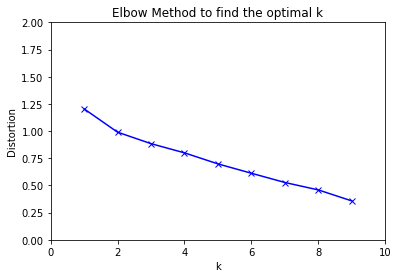

In [189]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 2.0])
plt.title('Dataset')

colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Cluster_dataSet)
    kmeanModel.fit(Cluster_dataSet)
    distortions.append(sum(np.min(cdist(Cluster_dataSet, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Cluster_dataSet.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method to find the optimal k')
plt.show()


Distoration is starting from around 1.25 when K=1, we know that based on the selected features, the differences between neighborhoods are not as significant as we thought. Meanwhile, when K increases, the centroids are closer to the clusters centroid, the improvement will decline. We can see that there are 2 slight elbow shape points created, which are 3 and 5.In this case, I will be choosing K=4 to average the elbow effect. 

### Modeling
Apply K-means on dataset and take look at cluster labels

In [202]:
clusterNum=4
k_means=KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit(X)
labels=k_means.labels_
print(labels)

[1 3 1 3 1 1 1 1 0 0 0 0 1 0 0 2 2 2 2]


In [203]:
nei_new['Clus_km']=labels
nei_new.head()

,Neighborhood,Price,Food,Shopping,Lifestyle,Commute,Workout,Entertain,Clus_km
0,Briar Hills,1033941.0,5,2,1,1,4,0,1
1,Emerald Vista,880500.0,7,1,1,0,3,1,3
2,Riva & Rainsong,1021929.0,11,5,1,1,1,1,1
3,San Ramon Village,855731.0,3,2,1,1,4,0,3
4,Silvergate Area,1002000.0,5,0,2,2,3,0,1


In [208]:
df_map=df_coords[['Neighborhood','Latitude','Longitude']].merge(nei_new[['Neighborhood','Clus_km']], left_on='Neighborhood',right_on='Neighborhood', how='left')
df_map.head()

,Neighborhood,Latitude,Longitude,Clus_km
0,Briar Hills,37.723026,-121.929765,1
1,Emerald Vista,37.713075,-121.924975,3
2,Riva & Rainsong,37.704230,-121.916350,1
3,San Ramon Village,37.721580,-121.928650,3
4,Silvergate Area,37.707241,-121.946475,1


### Visualize the clustering in map

In [218]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_map['Latitude'], df_map['Longitude'], df_map['Neighborhood'], df_map['Clus_km']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 5. Clustering and neighborhood selection recommendation

In [204]:
nei_new.groupby('Clus_km').mean()

,Price,Food,Shopping,Lifestyle,Commute,Workout,Entertain
Clus_km,,,,,,,
0,1.223128e+06,4.166667,1.166667,0.333333,0.333333,2.166667,0.500000
1,1.041720e+06,5.571429,2.142857,0.857143,0.857143,1.571429,0.571429
2,1.544738e+06,1.000000,0.250000,0.000000,0.000000,1.750000,0.250000
3,8.681155e+05,5.000000,1.500000,1.000000,0.500000,3.500000,0.500000


####  __Cluster 0: High rent, medium convenience, and medium productivity__
#### __Cluster 1: Medium rent, high convenience, and medium high productivity__
#### __Cluster 2: Very high rent, less convenience, and medium low productivity__
#### __Cluster 3: low rent, medium high convenience, and medium high productivity__